In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]

# Data Reshape

In [5]:
x_train_full = x_train_full.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [6]:
x_train_n = x_train_full / 255.0
x_test_n = x_test / 255.0

In [7]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 
x_test = x_test_n

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [11]:
model_history = model.fit(x_train, y_train, epochs=30, batch_size=64,
                         validation_data=(x_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 28s 32ms/step - loss: 0.8409 - accuracy: 0.7134 - val_loss: 0.6633 - val_accuracy: 0.7896
Epoch 2/30
860/860 [==============================] - 26s 30ms/step - loss: 0.5329 - accuracy: 0.8083 - val_loss: 0.5102 - val_accuracy: 0.8210
Epoch 3/30
860/860 [==============================] - 27s 32ms/step - loss: 0.4764 - accuracy: 0.8297 - val_loss: 0.4424 - val_accuracy: 0.8430
Epoch 4/30
860/860 [==============================] - 29s 34ms/step - loss: 0.4411 - accuracy: 0.8426 - val_loss: 0.4040 - val_accuracy: 0.8572
Epoch 5/30
860/860 [==============================] - 28s 33ms/step - loss: 0.4147 - accuracy: 0.8525 - val_loss: 0.4473 - val_accuracy: 0.8380
Epoch 6/30
860/860 [==============================] - 29s 34ms/step - loss: 0.3921 - accuracy: 0.8599 - val_loss: 0.4134 - val_accuracy: 0.8552
Epoch 7/30
860/860 [==============================] - 26s 30ms/step - loss: 0.3743 - accuracy: 0.8653 - val_loss: 0.3856 - val_accuracy:

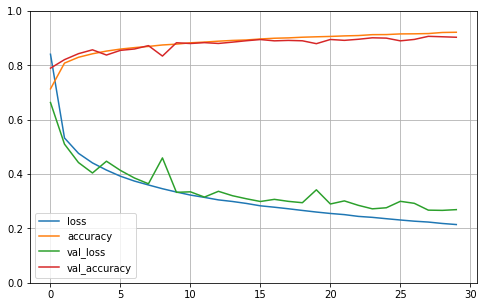

In [12]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
ev = model.evaluate(x_test_n, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2793 - accuracy: 0.8996


In [14]:
ev

[0.2793269753456116, 0.8996000289916992]

In [15]:
x_new = x_test[:3]

In [16]:
y_pred = model.predict(x_new)
y_pred = np.round(y_pred).astype(int)
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [17]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


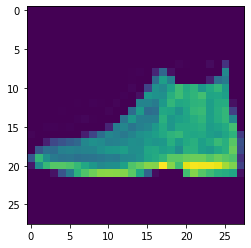

In [18]:
print(plt.imshow(x_test[0].reshape((28,28))))

AxesImage(54,36;334.8x217.44)


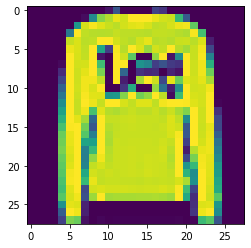

In [19]:
print(plt.imshow(x_test[1].reshape((28,28))))

AxesImage(54,36;334.8x217.44)


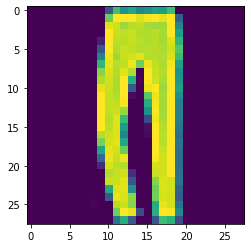

In [20]:
print(plt.imshow(x_test[2].reshape((28,28))))

Label     Description<br>
0         T-shirt<br>
1         Trouser<br>
2         Pullover<br>
3         Dress<br>
4         Coat<br>
5         Sandal<br>
6         Shirt<br>
7         Sneaker<br>
8         Bag<br>
9         Ankle boot<br>